# Sleep Analysis

Sleep analysis using data from the Samsung Galaxy Watch and Samsung Health App: https://www.samsung.com/ar/apps/samsung-health/#Sleep

How to download your personal data from Samsung Health: https://www.samsung.com/us/support/answer/ANS00085104/

## Load and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
columnas = ['physical_recovery', 
            'sleep_duration', 
            'original_wake_up_time', 
            'movement_awakening', 
            'original_bed_time',
            'sleep_cycle',
            'efficiency',
            'sleep_score', 
            'sleep_duration', 
            'com.samsung.health.sleep.start_time',
            'com.samsung.health.sleep.update_time',
            'com.samsung.health.sleep.create_time',
            'com.samsung.health.sleep.end_time',
            'com.samsung.health.sleep.time_offset']

df_sleep = pd.read_csv('data/sleep.csv', usecols=columnas, 
                       parse_dates=['original_wake_up_time',
                                    'original_bed_time',
                                    'com.samsung.health.sleep.start_time',
                                    'com.samsung.health.sleep.update_time',
                                    'com.samsung.health.sleep.create_time',
                                    'com.samsung.health.sleep.end_time'])

df_sleep.rename(columns=lambda x: x.replace('com.samsung.health.sleep.', ''), inplace=True)

In [3]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   physical_recovery      144 non-null    int64         
 1   original_wake_up_time  122 non-null    datetime64[ns]
 2   movement_awakening     144 non-null    int64         
 3   original_bed_time      122 non-null    datetime64[ns]
 4   sleep_cycle            144 non-null    int64         
 5   efficiency             144 non-null    int64         
 6   sleep_score            144 non-null    int64         
 7   sleep_duration         144 non-null    int64         
 8   start_time             144 non-null    datetime64[ns]
 9   update_time            144 non-null    datetime64[ns]
 10  create_time            144 non-null    datetime64[ns]
 11  time_offset            144 non-null    object        
 12  end_time               144 non-null    datetime64[ns]
dtypes: da

In [4]:
df_sleep.describe()

,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,end_time
count,144.000000,122,144.000000,122,144.000000,144.000000,144.000000,144.000000,144,144,144,144
mean,61.583333,2024-03-04 13:09:05.901639424,21.652778,2024-03-04 06:08:11.311475456,3.631944,88.979167,76.270833,395.152778,2024-02-25 14:16:29.166666752,2024-02-26 03:12:07.991639040,2024-02-25 21:25:54.469006848,2024-02-25 20:53:18.333333248
min,9.000000,2023-12-19 12:43:00,2.000000,2023-12-19 03:50:00,0.000000,74.000000,38.000000,58.000000,2023-12-19 03:50:00,2023-12-26 14:16:17.810000,2023-12-19 12:43:28.071000,2023-12-19 12:24:00
25%,55.000000,2024-02-03 17:53:00,15.000000,2024-02-03 10:07:45,3.000000,87.000000,71.750000,359.250000,2024-01-19 23:36:15,2024-01-20 07:39:50.130500096,2024-01-20 07:38:36.479250176,2024-01-20 07:15:00
50%,63.000000,2024-03-07 13:46:00,20.000000,2024-03-07 08:21:00,4.000000,89.000000,80.000000,409.500000,2024-02-25 18:08:30,2024-02-26 01:50:54.664499968,2024-02-26 01:50:38.580999936,2024-02-26 01:18:30
75%,71.000000,2024-04-07 04:27:15,27.250000,2024-04-06 22:28:45,4.250000,91.250000,84.000000,451.500000,2024-04-01 11:58:00,2024-04-01 19:23:24.788750080,2024-04-01 19:22:55.180499968,2024-04-01 18:36:00
max,93.000000,2024-05-07 10:05:00,53.000000,2024-05-07 03:27:00,6.000000,98.000000,97.000000,619.000000,2024-05-07 03:27:00,2024-05-07 10:09:57.415000,2024-05-07 10:09:44.218000,2024-05-07 09:48:00
std,14.478100,NaN,10.019086,NaN,1.250155,3.916022,11.928235,99.082880,NaN,NaN,NaN,NaN


In [5]:
df_sleep.tail(10)

,physical_recovery,original_wake_up_time,movement_awakening,original_bed_time,sleep_cycle,efficiency,sleep_score,sleep_duration,start_time,update_time,create_time,time_offset,end_time
134,72,2024-04-28 12:43:00,15,2024-04-28 04:44:00,3,91,88,466,2024-04-28 04:44:00,2024-04-28 12:50:16.611,2024-04-28 12:50:06.394,UTC-0300,2024-04-28 12:30:00
135,75,2024-04-29 11:15:00,12,2024-04-29 03:15:00,4,91,90,448,2024-04-29 03:15:00,2024-04-29 11:39:52.023,2024-04-29 11:39:40.293,UTC-0300,2024-04-29 10:43:00
136,63,2024-04-30 10:44:00,30,2024-04-30 03:45:00,3,85,80,412,2024-04-30 03:45:00,2024-04-30 10:44:32.066,2024-04-30 10:44:18.369,UTC-0300,2024-04-30 10:37:00
137,62,2024-05-01 12:18:00,15,2024-05-01 04:51:00,5,90,84,426,2024-05-01 04:51:00,2024-05-01 12:35:30.011,2024-05-01 12:35:15.182,UTC-0300,2024-05-01 11:57:00
138,76,2024-05-02 12:01:00,37,2024-05-02 02:46:00,4,88,82,528,2024-05-02 02:46:00,2024-05-02 12:23:09.229,2024-05-02 12:23:00.160,UTC-0300,2024-05-02 11:34:00
139,55,2024-05-03 10:17:00,23,2024-05-03 03:24:00,5,88,75,386,2024-05-03 03:24:00,2024-05-03 10:24:59.968,2024-05-03 10:24:46.286,UTC-0300,2024-05-03 09:50:00
140,43,2024-05-04 09:47:00,31,2024-05-04 04:35:00,2,85,57,308,2024-05-04 04:35:00,2024-05-04 09:47:21.728,2024-05-04 09:47:10.679,UTC-0300,2024-05-04 09:43:00
141,75,2024-05-05 11:42:00,34,2024-05-05 03:13:00,5,87,80,482,2024-05-05 03:13:00,2024-05-05 12:00:35.166,2024-05-05 12:00:08.187,UTC-0300,2024-05-05 11:15:00
142,65,2024-05-06 11:07:00,18,2024-05-06 03:29:00,3,91,82,437,2024-05-06 03:29:00,2024-05-06 11:15:38.706,2024-05-06 11:15:26.330,UTC-0300,2024-05-06 10:46:00
143,53,2024-05-07 10:05:00,20,2024-05-07 03:27:00,2,90,74,381,2024-05-07 03:27:00,2024-05-07 10:09:57.415,2024-05-07 10:09:44.218,UTC-0300,2024-05-07 09:48:00


## Sort data

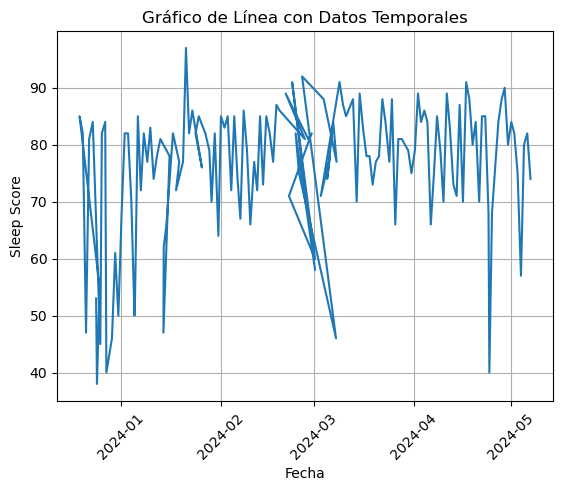

In [6]:
plt.plot(df_sleep['start_time'], df_sleep['sleep_score'])
plt.xlabel('Fecha')
plt.ylabel('Sleep Score')
plt.title('Gráfico de Línea con Datos Temporales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
# check if data is out of order
is_sorted_increasing = df_sleep['start_time'].is_monotonic_increasing
is_sorted_decreasing = df_sleep['start_time'].is_monotonic_decreasing
print("is_sorted_increasing", is_sorted_increasing)
print("is_sorted_decreasing", is_sorted_decreasing)
# Find where the monotony is broken in the 'start_time' column
# If they both return False, it is because they are not ordered correctly
# If they are not sorted, I sort them according to start_time
if not is_sorted_increasing and not is_sorted_decreasing:
    df_sleep = df_sleep.sort_values(by='start_time')
    

is_sorted_increasing False
is_sorted_decreasing False


## Apply time offset

In [8]:
columnas_datetime = ['original_wake_up_time', 'original_bed_time', 'start_time', 'update_time', 'create_time', 'end_time']

# the dataset has different time_offset
# so the function below is to format them to the exact time

# Function to adjust the columns according to the time offset
def ajustar_columnas_por_offset(row):
    offset = row['time_offset']
    if '+' in offset:
        hours = -int(offset.split('+')[1][:2])
    elif '-' in offset:
        hours = int(offset.split('-')[1][:2])
    else:
        hours = 0
    return row[columnas_datetime] - pd.Timedelta(hours=hours)

# Apply the function to each row to adjust the columns based on the offset
df_sleep[columnas_datetime] = df_sleep.apply(ajustar_columnas_por_offset, axis=1)

## Data Visualization

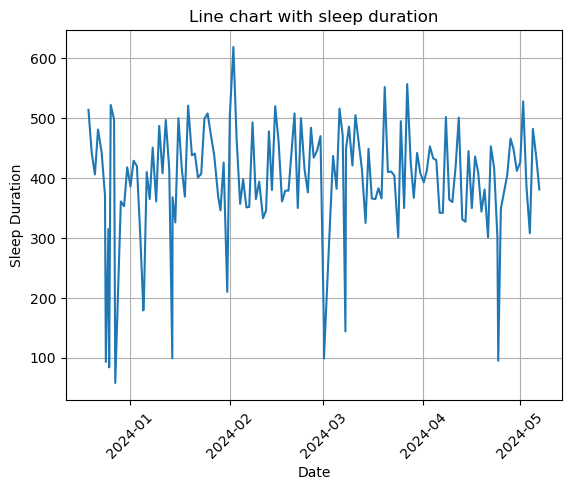

In [9]:
plt.plot(df_sleep['start_time'], df_sleep['sleep_duration'])
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Line chart with sleep duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

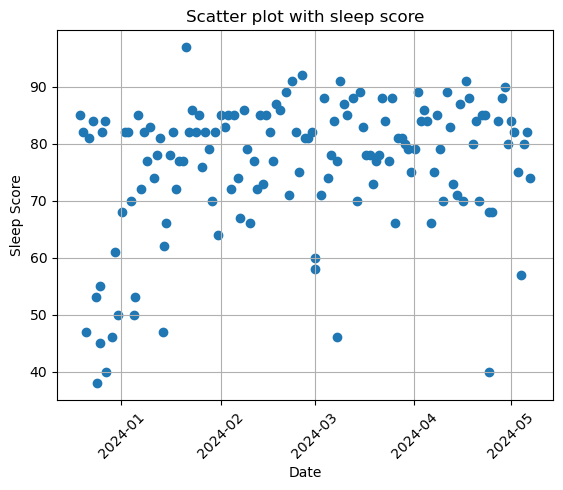

In [10]:
plt.scatter(df_sleep['start_time'], df_sleep['sleep_score'])
plt.xlabel('Date')
plt.ylabel('Sleep Score')
plt.title('Scatter plot with sleep score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

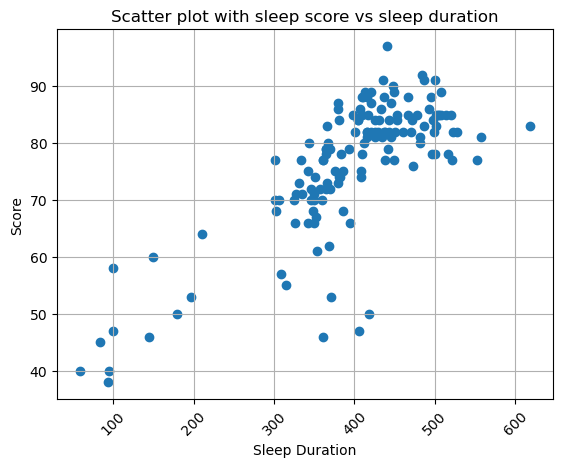

In [11]:
plt.scatter(df_sleep['sleep_duration'], df_sleep['sleep_score'])
plt.xlabel('Sleep Duration')
plt.ylabel('Score')
plt.title('Scatter plot with sleep score vs sleep duration')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation matrix:
                    physical_recovery  sleep_duration  movement_awakening  \
physical_recovery            1.000000        0.788436           -0.089949   
sleep_duration               0.788436        1.000000            0.134938   
movement_awakening          -0.089949        0.134938            1.000000   
sleep_cycle                  0.575639        0.673681           -0.044331   
efficiency                   0.116896       -0.022682           -0.886722   
sleep_score                  0.782855        0.772259           -0.213076   

                    sleep_cycle  efficiency  sleep_score  
physical_recovery      0.575639    0.116896     0.782855  
sleep_duration         0.673681   -0.022682     0.772259  
movement_awakening    -0.044331   -0.886722    -0.213076  
sleep_cycle            1.000000    0.141264     0.550241  
efficiency             0.141264    1.000000     0.242647  
sleep_score            0.550241    0.242647     1.000000  


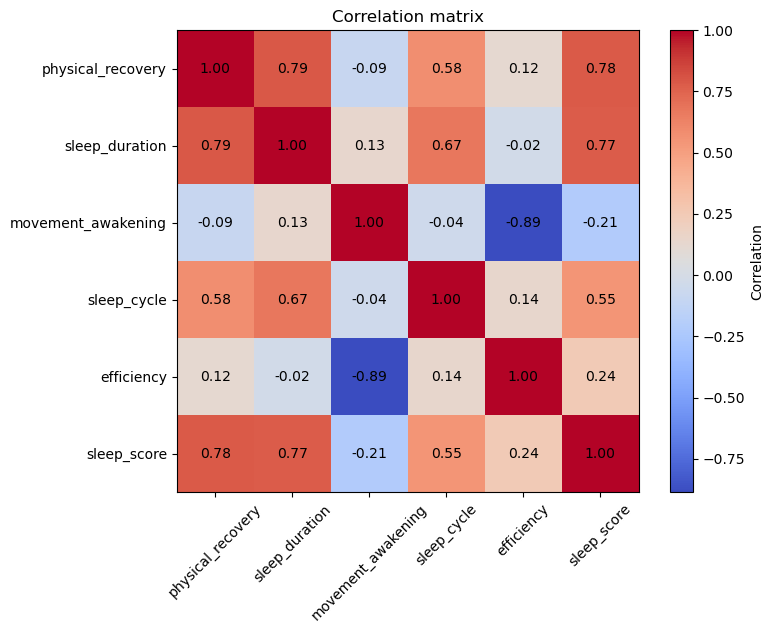

In [12]:
columnas_deseadas = ['physical_recovery', 'sleep_duration','movement_awakening', 'sleep_cycle', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

correlation_matrix = df_seleccionado.corr()

print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(heatmap, label='Correlation')
plt.title('Correlation matrix')
plt.xticks(ticks=range(len(columnas_deseadas)), labels=columnas_deseadas, rotation=45)
plt.yticks(ticks=range(len(columnas_deseadas)), labels=columnas_deseadas)

for i in range(len(columnas_deseadas)):
    for j in range(len(columnas_deseadas)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

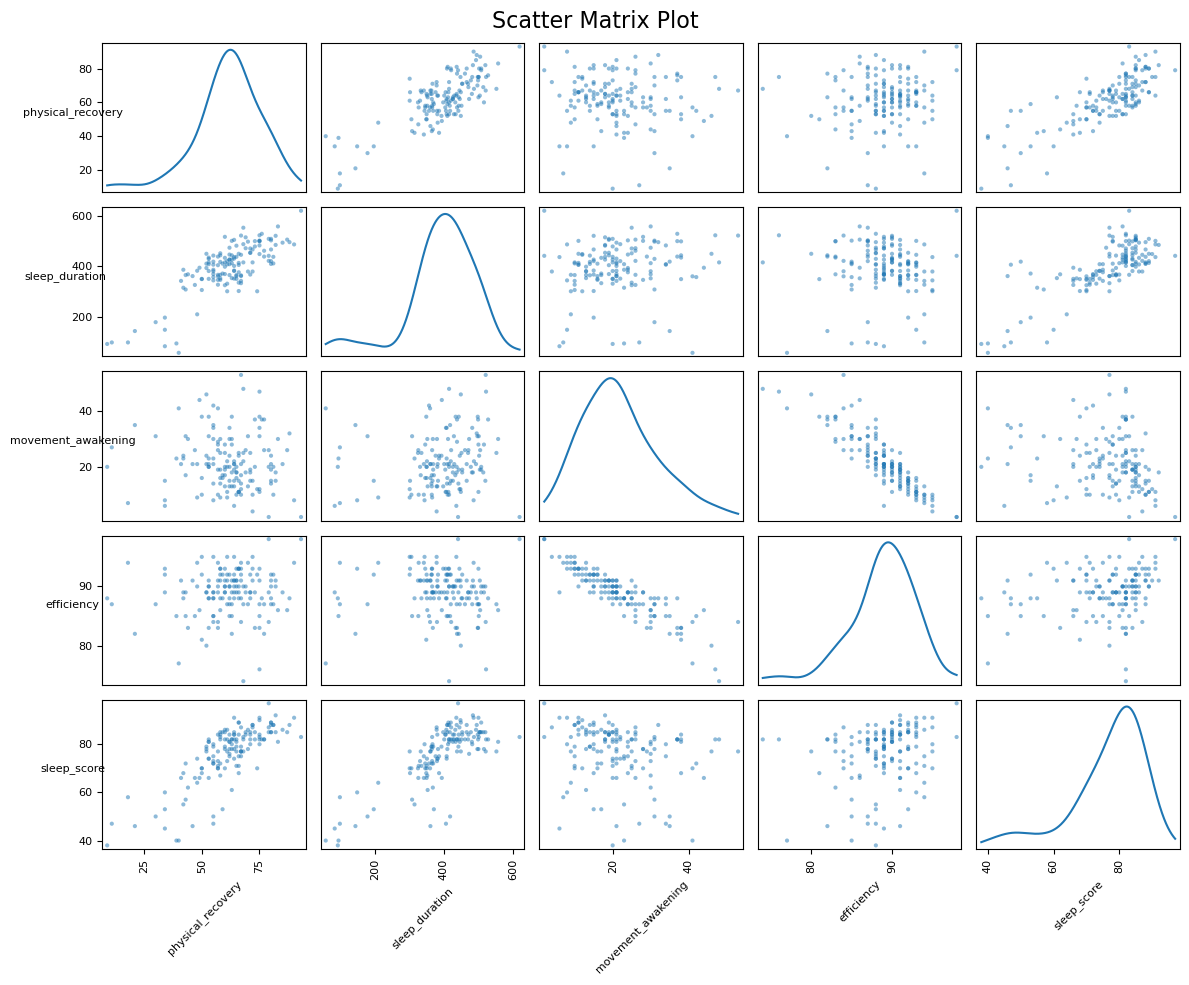

In [13]:
columnas_deseadas = ['physical_recovery', 'sleep_duration', 'movement_awakening', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

scatter_matrix = pd.plotting.scatter_matrix(df_seleccionado, figsize=(12, 10), diagonal='kde')

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatter Matrix Plot', fontsize=16)
plt.tight_layout()
plt.show()

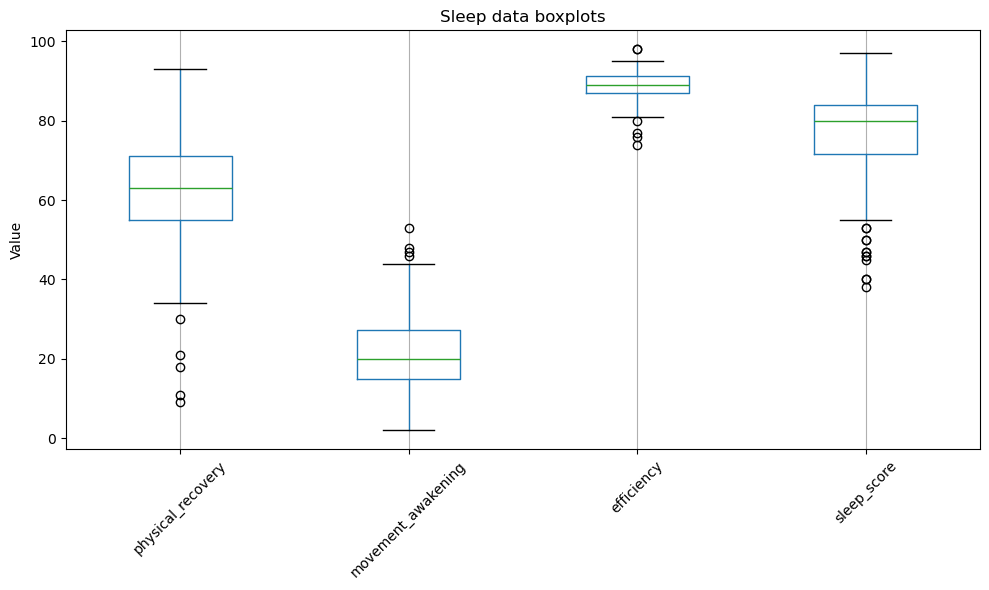

In [14]:
columnas_deseadas = ['physical_recovery', 'movement_awakening', 'efficiency', 'sleep_score']
df_seleccionado = df_sleep[columnas_deseadas]

plt.figure(figsize=(10, 6))
df_seleccionado.boxplot()
plt.title('Sleep data boxplots')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

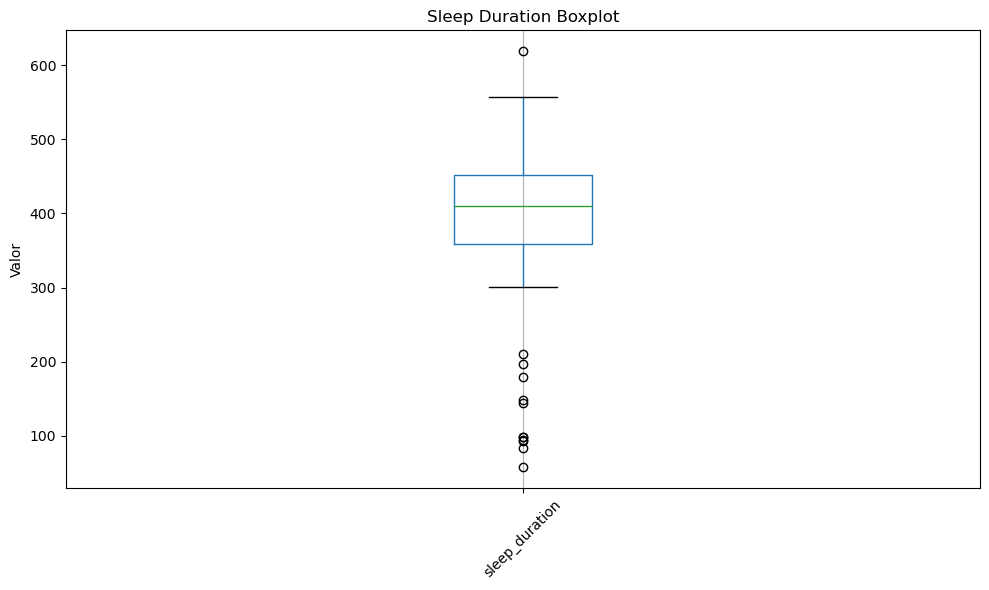

In [15]:
columnas_deseadas = ['sleep_duration']
df_seleccionado = df_sleep[columnas_deseadas]

plt.figure(figsize=(10, 6))
df_seleccionado.boxplot()
plt.title('Sleep Duration Boxplot')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Data transformation

In [16]:
df_sleep['hora'] = df_sleep['start_time'].dt.hour
df_sleep['hora'].value_counts()

hora
0     44
1     36
23    20
2     16
3     10
22     5
4      3
5      2
6      2
11     1
10     1
8      1
7      1
19     1
21     1
Name: count, dtype: int64

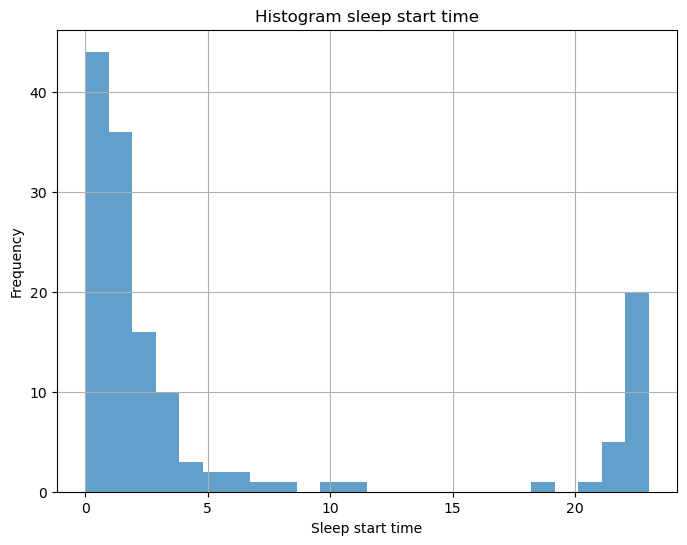

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df_sleep['hora'], bins=24, alpha=0.7)
plt.xlabel('Sleep start time')
plt.ylabel('Frequency')
plt.title('Histogram sleep start time')
plt.grid(True)
plt.show()


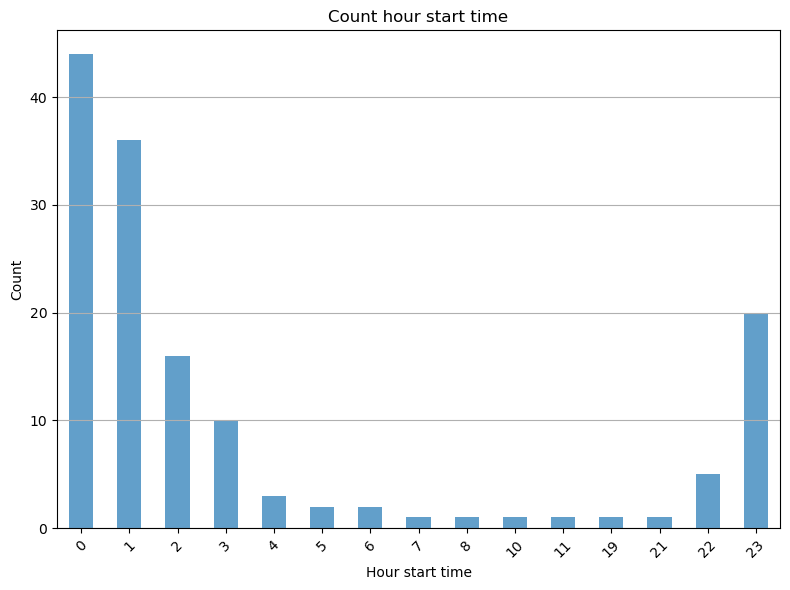

In [18]:
plt.figure(figsize=(8, 6))
df_sleep['hora'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.xlabel('Hour start time')
plt.ylabel('Count')
plt.title('Count hour start time')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
df_sleep['hora_end'] = df_sleep['end_time'].dt.hour
df_sleep['hora_end'].value_counts()

hora_end
7     37
8     36
6     26
9     24
10     5
5      5
11     4
4      3
12     1
3      1
13     1
21     1
Name: count, dtype: int64

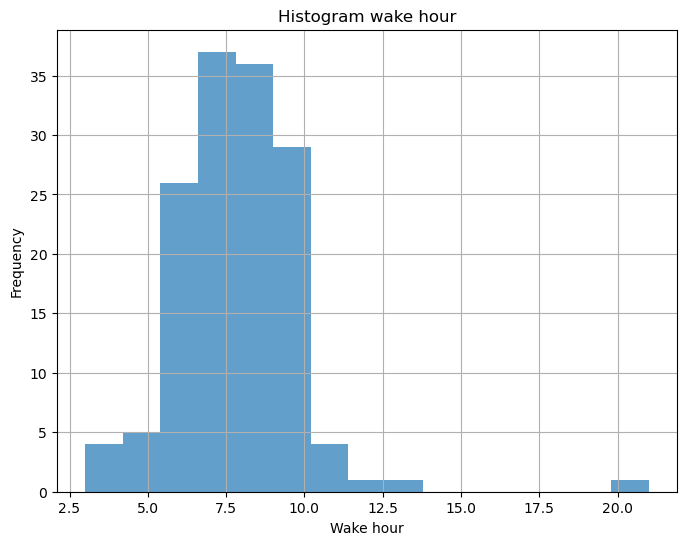

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df_sleep['hora_end'], bins=15, alpha=0.7)
plt.xlabel('Wake hour')
plt.ylabel('Frequency')
plt.title('Histogram wake hour')
plt.grid(True)
plt.show()


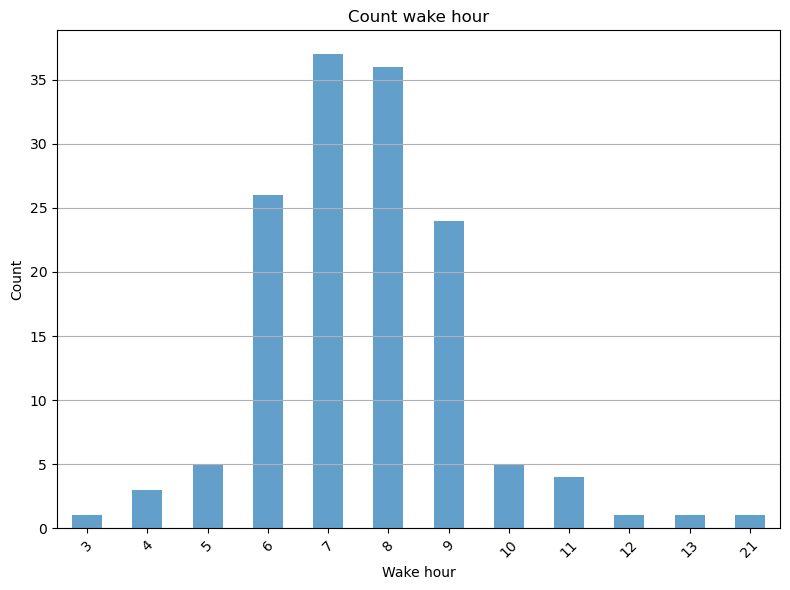

In [21]:
plt.figure(figsize=(8, 6))
df_sleep['hora_end'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.xlabel('Wake hour')
plt.ylabel('Count')
plt.title('Count wake hour')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
def asignar_valor(score):
    if score < 10:
        return 0
    elif score < 20:
        return 1
    elif score < 30:
        return 2
    elif score < 40:
        return 3
    elif score < 50:
        return 4
    elif score < 60:
        return 5
    elif score < 70:
        return 6
    elif score < 80:
        return 7
    elif score < 90:
        return 8
    else:
        return 9

df_sleep['score'] = df_sleep['sleep_score'].apply(asignar_valor)
df_sleep['score']

3      8
4      8
5      4
6      8
7      8
      ..
139    7
140    5
141    8
142    8
143    7
Name: score, Length: 144, dtype: int64

In [23]:
df_sleep['score'].value_counts()

score
8    67
7    44
6    12
5     7
4     7
9     6
3     1
Name: count, dtype: int64

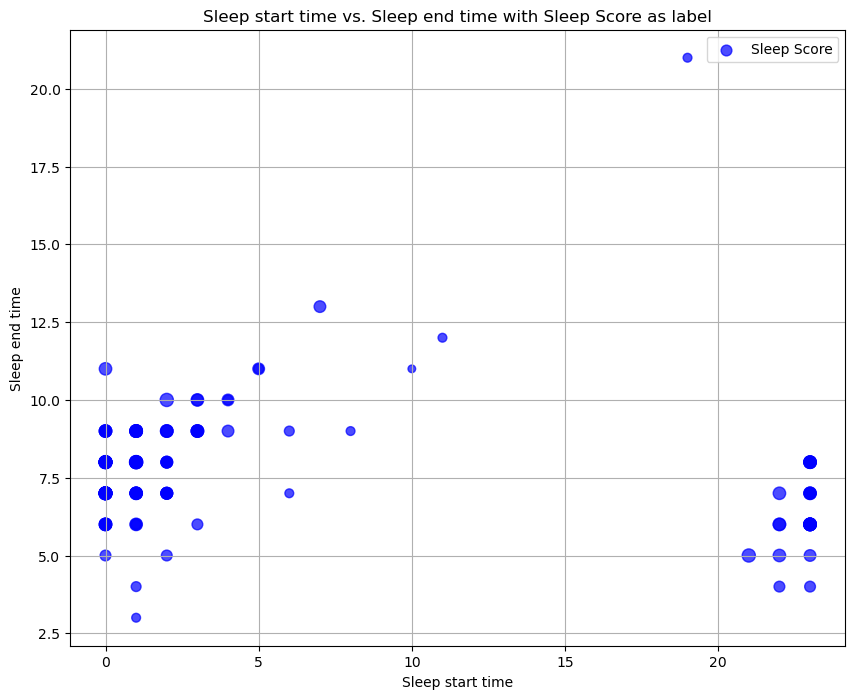

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(df_sleep['hora'], df_sleep['hora_end'], s=df_sleep['score']*10, c='blue', alpha=0.7, label='Sleep Score')
plt.xlabel('Sleep start time')
plt.ylabel('Sleep end time')
plt.title('Sleep start time vs. Sleep end time with Sleep Score as label')
plt.legend()
plt.grid(True)
plt.show()


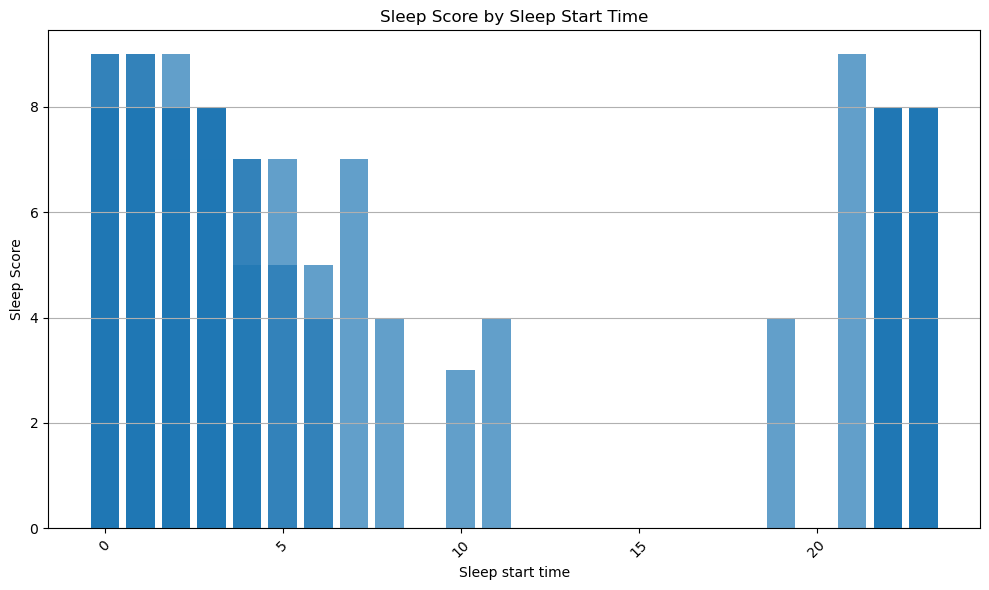

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(df_sleep['hora'], df_sleep['score'], alpha=0.7)
plt.xlabel('Sleep start time')
plt.ylabel('Sleep Score')
plt.title('Sleep Score by Sleep Start Time')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


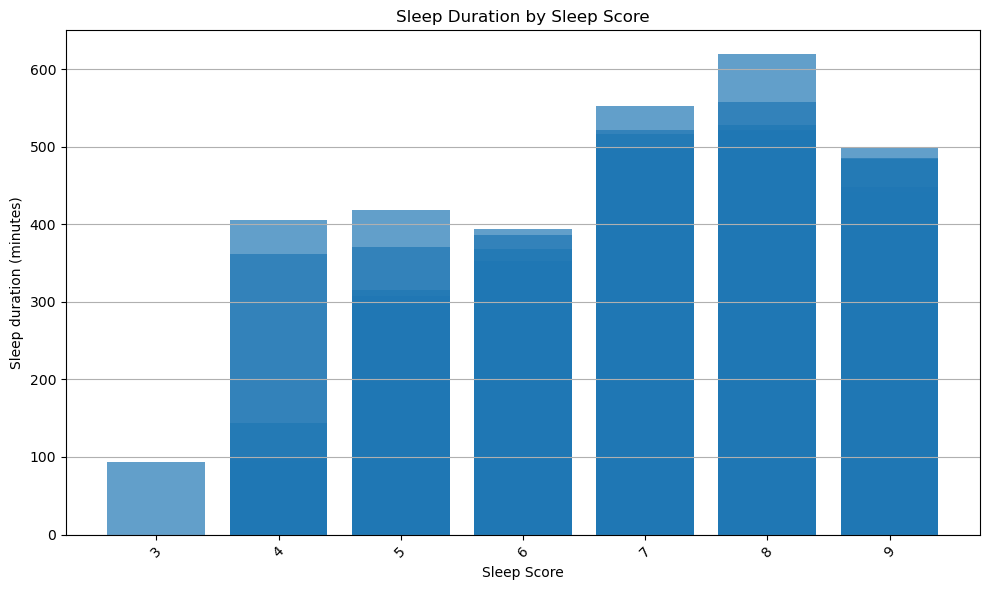

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(df_sleep['score'], df_sleep['sleep_duration'], alpha=0.7)
plt.xlabel('Sleep Score')
plt.ylabel('Sleep duration (minutes)')
plt.title('Sleep Duration by Sleep Score')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


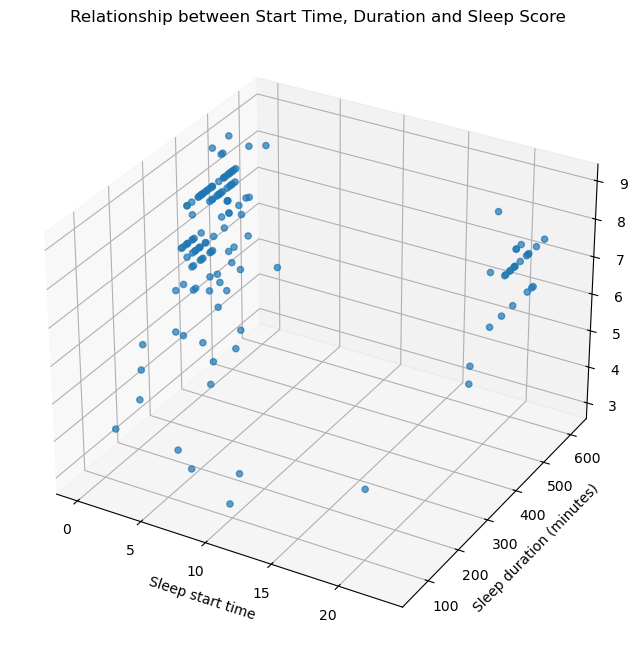

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sleep['hora'], df_sleep['sleep_duration'], df_sleep['score'], alpha=0.7)
ax.set_xlabel('Sleep start time')
ax.set_ylabel('Sleep duration (minutes)')
ax.set_zlabel('Sleep Score')
ax.set_title('Relationship between Start Time, Duration and Sleep Score')
plt.show()


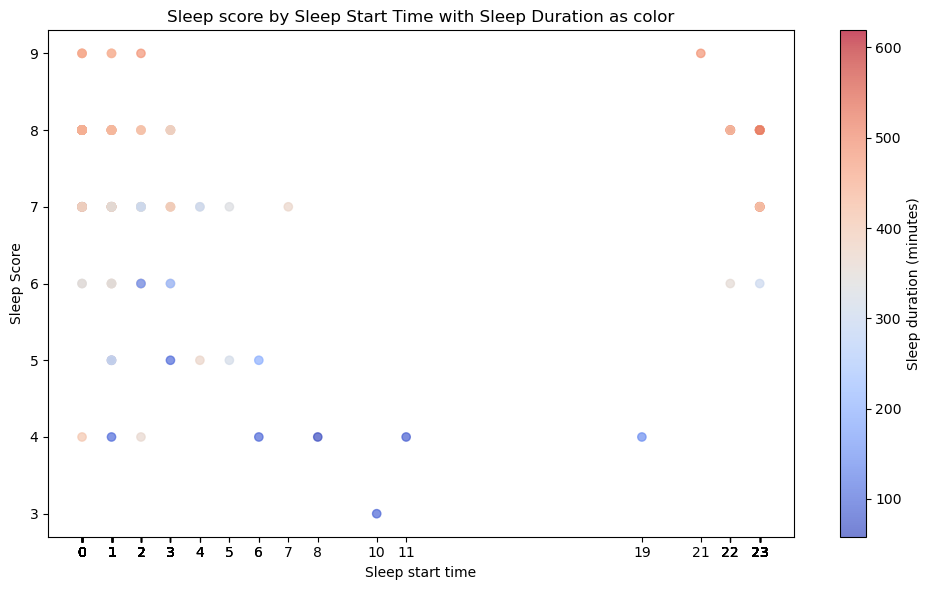

In [28]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_sleep['hora'], df_sleep['score'], c=df_sleep['sleep_duration'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Sleep duration (minutes)')

plt.xlabel('Sleep start time')
plt.ylabel('Sleep Score')
plt.title('Sleep score by Sleep Start Time with Sleep Duration as color')

plt.xticks(df_sleep['hora'], df_sleep['hora'])
plt.tight_layout()
plt.show()


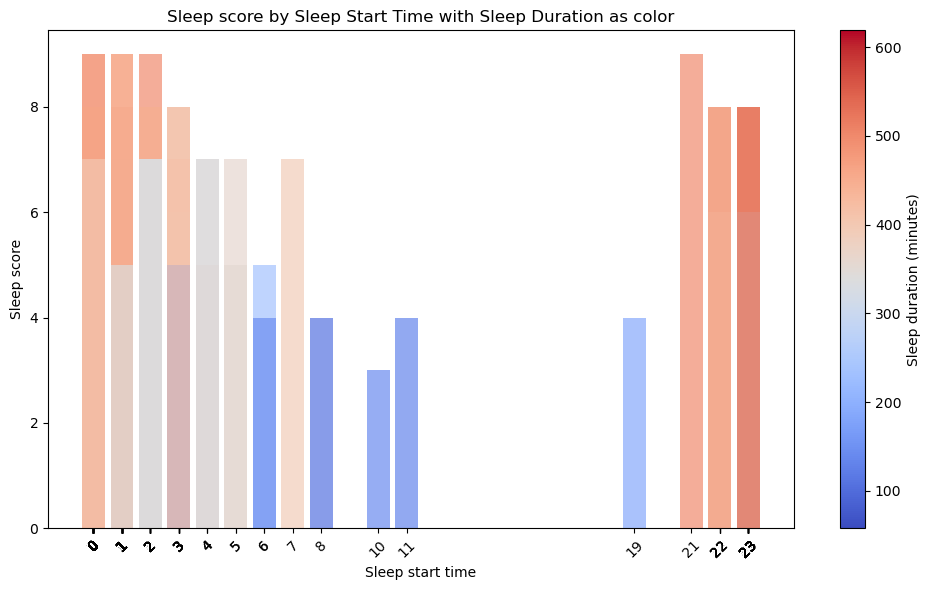

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(df_sleep['hora'], df_sleep['score'], alpha=0.7, color=plt.cm.coolwarm(df_sleep['sleep_duration'] / df_sleep['sleep_duration'].max()))

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=df_sleep['sleep_duration'].min(), vmax=df_sleep['sleep_duration'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Sleep duration (minutes)')

ax.set_xlabel('Sleep start time')
ax.set_ylabel('Sleep score')
ax.set_title('Sleep score by Sleep Start Time with Sleep Duration as color')
ax.set_xticks(df_sleep['hora'])
ax.set_xticklabels(df_sleep['hora'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


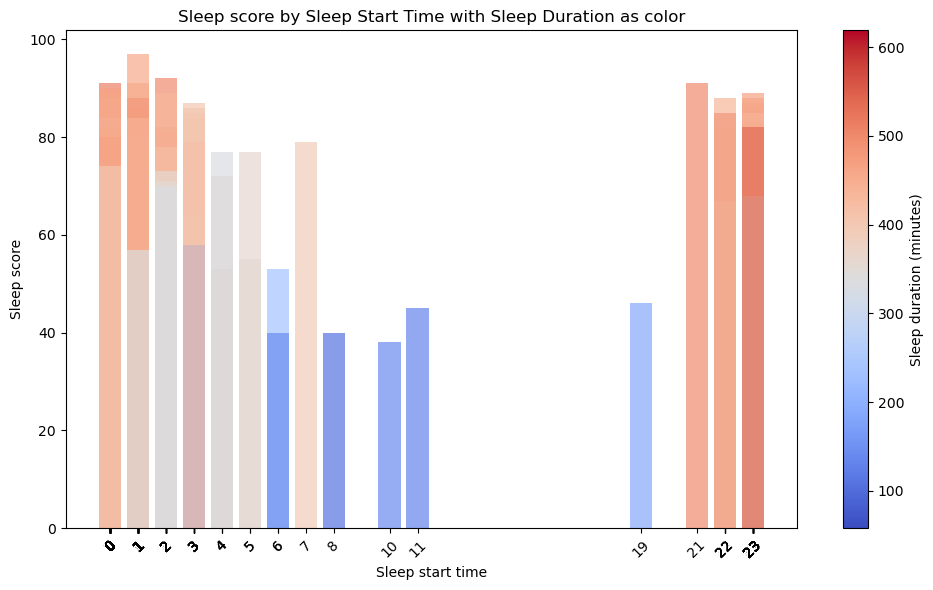

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(df_sleep['hora'], df_sleep['sleep_score'], alpha=0.7, color=plt.cm.coolwarm(df_sleep['sleep_duration'] / df_sleep['sleep_duration'].max()))

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=df_sleep['sleep_duration'].min(), vmax=df_sleep['sleep_duration'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Sleep duration (minutes)')

ax.set_xlabel('Sleep start time')
ax.set_ylabel('Sleep score')
ax.set_title('Sleep score by Sleep Start Time with Sleep Duration as color')
ax.set_xticks(df_sleep['hora'])
ax.set_xticklabels(df_sleep['hora'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
